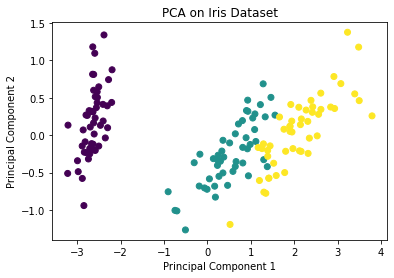

0.9787605633802817


In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap#carefull run pip install umap-learn, not umap
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.manifold import trustworthiness

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

# Plot the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.show()
print(trustworthiness(X, X_transformed))

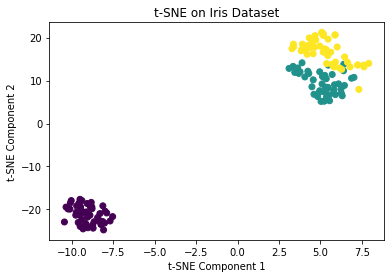

0.9888450704225352


In [2]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_transformed = tsne.fit_transform(X)

# Plot the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE on Iris Dataset')
plt.show()
print(trustworthiness(X, X_transformed))

/home/theomichel/graph_project/env/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


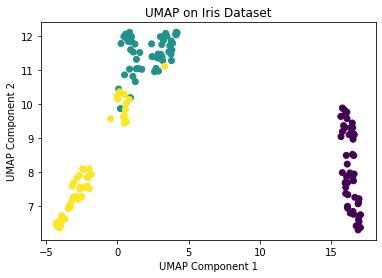

0.9824037558685446


In [3]:
# Apply UMAP
umap_obj = umap.UMAP(n_components=2, random_state=42)
X_transformed = umap_obj.fit_transform(X)

# Plot the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP on Iris Dataset')
plt.show()
print(trustworthiness(X, X_transformed))


In [4]:
from utils import embedding, visualization, weights, base, build
from utils.embedding import EmbedAlgs
from data import preprocessing



In [5]:
from sklearn.utils import shuffle
import random
random.shuffle(X)
random.shuffle(y)

X_a = X[0:80,:3]
y_a = y[0:80]
print(X_a.shape)

(80, 3)


In [6]:
#plot the original data


(37, 3)


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.30it/s]


AttributeError: 'Figure' object has no attribute 'set_suptitle'

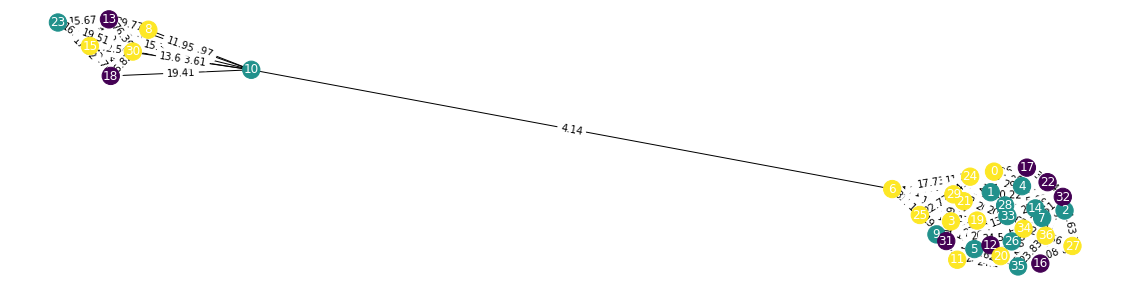

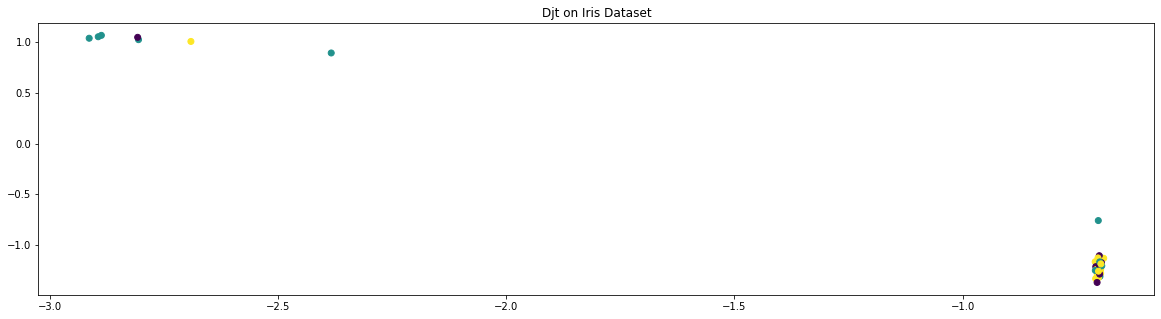

In [7]:
X_trans, y_trans = preprocessing.remove_duplicities(X_a, y_a)
print(X_trans.shape)
graph = build.build_graph_cheapest(X_trans)
visualization.show_graph(graph,labels=y_trans)
embeddings = base.embed_data(X_trans, EmbedAlgs.node2vec, dims=2, walk_length=100, num_walks=10, seed=0)
# embeddings = embedding.embed_data(X_trans, weight_fun=weights.reciprocal, walk_length=100, num_walks=10)
visualization.show_embedding(embeddings, labels=y_trans, show_numbers=False, aspect='auto',title="Djt on Iris Dataset")


visualization.show_data(X_trans, graph, labels=y_trans, aspect='auto')
print(trustworthiness(X_trans, embeddings))